# Importing Libraries

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [16]:
# Importing the dataset
dataset = pd.read_csv('Bank_Predictions.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
column_to_add = dataset['Customer_ID'].values.reshape(-1, 1)
X = np.hstack((X, column_to_add))
X

array([[619, 'France', 'Female', ..., 1, 101348.88, 15634602],
       [608, 'Spain', 'Female', ..., 1, 112542.58, 15647311],
       [502, 'France', 'Female', ..., 0, 113931.57, 15619304],
       ...,
       [709, 'France', 'Female', ..., 1, 42085.58, 15584532],
       [772, 'Germany', 'Male', ..., 0, 92888.52, 15682355],
       [792, 'France', 'Female', ..., 0, 38190.78, 15628319]],
      dtype=object)

# Encoding Dataset

In [17]:
# ------ Part-1: Data preprocessing ----------

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label encoding for gender
labelencoder_gender = LabelEncoder()
X[:, 2] = labelencoder_gender.fit_transform(X[:, 2])

# OneHotEncoding for the country column using ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), [1])],  # The column numbers to be transformed (here is column 2)
    remainder='passthrough'                                  # Leave the rest of the columns untouched
)
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 619, ..., 1, 101348.88, 15634602],
       [0.0, 1.0, 608, ..., 1, 112542.58, 15647311],
       [0.0, 0.0, 502, ..., 0, 113931.57, 15619304],
       ...,
       [0.0, 0.0, 709, ..., 1, 42085.58, 15584532],
       [1.0, 0.0, 772, ..., 0, 92888.52, 15682355],
       [0.0, 0.0, 792, ..., 0, 38190.78, 15628319]], dtype=object)

# Spliting Dataset and Training Set

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_test

array([[1.0, 0.0, 597, ..., 1, 192852.67, 15615753],
       [0.0, 0.0, 523, ..., 0, 128702.1, 15654700],
       [0.0, 1.0, 706, ..., 1, 75732.25, 15633877],
       ...,
       [0.0, 1.0, 578, ..., 0, 141533.19, 15772604],
       [1.0, 0.0, 650, ..., 1, 11276.48, 15787699],
       [1.0, 0.0, 573, ..., 0, 192950.6, 15579223]], dtype=object)

In [20]:
customer_id = X_test[:, -1].reshape(-1, 1)
X_test = X_test[:, :-1]
X_train = X_train[:, :-1]
customer_id

array([[15615753],
       [15654700],
       [15633877],
       ...,
       [15772604],
       [15787699],
       [15579223]], dtype=object)

In [21]:
X_test

array([[1.0, 0.0, 597, ..., 1, 1, 192852.67],
       [0.0, 0.0, 523, ..., 1, 0, 128702.1],
       [0.0, 1.0, 706, ..., 1, 1, 75732.25],
       ...,
       [0.0, 1.0, 578, ..., 1, 0, 141533.19],
       [1.0, 0.0, 650, ..., 1, 1, 11276.48],
       [1.0, 0.0, 573, ..., 1, 0, 192950.6]], dtype=object)

In [22]:
X_train

array([[0.0, 1.0, 667, ..., 1, 0, 163830.64],
       [1.0, 0.0, 427, ..., 1, 1, 57098.0],
       [0.0, 0.0, 535, ..., 1, 0, 185630.76],
       ...,
       [0.0, 0.0, 738, ..., 1, 0, 181429.87],
       [0.0, 1.0, 590, ..., 1, 1, 148750.16],
       [1.0, 0.0, 623, ..., 1, 0, 118855.26]], dtype=object)

# Feature Scaling

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Building ANN Model

In [25]:
# ------- Part-2: Build the ANN --------

# import keras library and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
classifier = Sequential()

# You might use the following parameters: activation: 'relu' and/or 'sigmoid', optimization function is 'adam', loss function is 'binary_crossentropy', number of epochs is 100, samples per epoch are 10)

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))  # input_dim should be number of features in X_train

# Adding second hidden layer
classifier.add(Dense(units=8, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_bool = (y_pred > 0.5)  # Convert probabilities to binary output

# Replace True and False with the required statements
y_pred_statements = np.where(y_pred_bool, "Account is closed", "Account is not closed")

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)



Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4894 - accuracy: 0.7669
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3862 - accuracy: 0.8409
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8511
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3493 - accuracy: 0.8562
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3439 - accuracy: 0.8571
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3416 - accuracy: 0.8591
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3389 - accuracy: 0.8616
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8608
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3350 - accuracy: 0.8634
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3345 - accura

In [26]:
for customer, prediction in zip(customer_id, y_pred_statements):
        if prediction == "Account is closed":
          print(f"Customer_ID: {customer[0]}, Status: {prediction}")

Customer_ID: 15804142, Status: ['Account is closed']
Customer_ID: 15588944, Status: ['Account is closed']
Customer_ID: 15703541, Status: ['Account is closed']
Customer_ID: 15573452, Status: ['Account is closed']
Customer_ID: 15721207, Status: ['Account is closed']
Customer_ID: 15723318, Status: ['Account is closed']
Customer_ID: 15724858, Status: ['Account is closed']
Customer_ID: 15716164, Status: ['Account is closed']
Customer_ID: 15684868, Status: ['Account is closed']
Customer_ID: 15673995, Status: ['Account is closed']
Customer_ID: 15592751, Status: ['Account is closed']
Customer_ID: 15672012, Status: ['Account is closed']
Customer_ID: 15761554, Status: ['Account is closed']
Customer_ID: 15637476, Status: ['Account is closed']
Customer_ID: 15610900, Status: ['Account is closed']
Customer_ID: 15813168, Status: ['Account is closed']
Customer_ID: 15593782, Status: ['Account is closed']
Customer_ID: 15727197, Status: ['Account is closed']
Customer_ID: 15716381, Status: ['Account is cl

In [27]:
unique, counts = np.unique(y_pred_statements, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Value: {u}, Count: {c}")

Value: Account is closed, Count: 286
Value: Account is not closed, Count: 1714


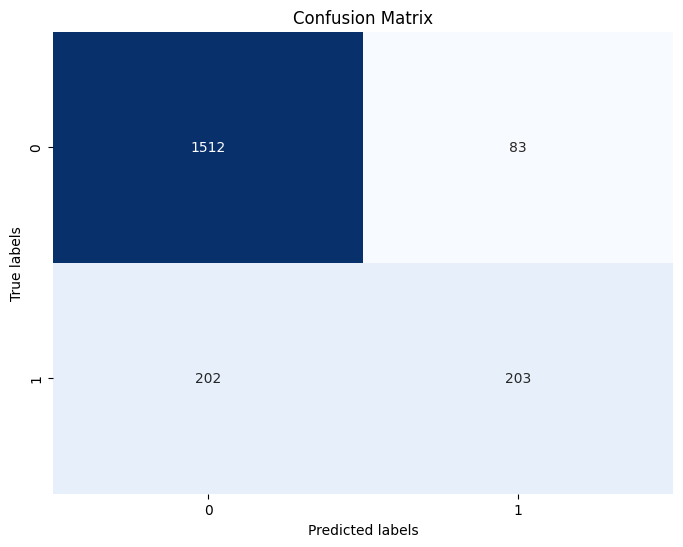

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

63/63 [==============================] - 0s 916us/step - loss: 0.3526 - accuracy: 0.8575
Accuracy on test set: 85.75%
